# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [14]:
#Dependencies and Setup
#Your environment may need to have pip installed seaborn, citipy, matplotlib, numpy, and others
#Imported more than needed to try different approaches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns #Did not use but want to for future improvements
import time
import random
import csv
import json
import openweathermapy.core as owm

###YOU NEED A KEY###
# Import API key for weathermap
#from api_keys import api_key
#or 
api_key = ""

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

#Output File (CSV), 
#saving for use later but can be moved down
output_data_file = "output_data/cities.csv"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Given range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [15]:
#Use random to find map coordinate list within suggested ranges
#I used size =  25, which is a low number, for speed and framing the script. 
#Change size to 60 for time limits of free api key, 1500 for paid key and patience, and better dataset
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

#Create the coordinate pairs using zip
lat_lngs = zip(lats, lngs)

# Generate Cities List

In [16]:
#Generate a list of cities near the suggested map coordinate ranges
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list. This drops duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

263

In [17]:
#Create dataframe
cities_df = pd.DataFrame(cities)
cities_df.columns = ['cities']
cities_df

#Loop through Dataframe
#Set base url and units
row_count = cities_df.count()
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL. The key is essential for this step.
query_url = f"{url}appid={api_key}&units={units}&q="

#Set list for suggested response results
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

In [18]:
#Use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    row_count = 0
    
# Get city names from the dataframe
    city_name = row['cities']

# Assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name}.")
    response = requests.get(query_url + city_name).json()
    time.sleep(1)
    
    try:
        print(f"Processing record {city_name}.")
        print(response)
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])

      
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
    print("------------")



Retrieving Results for Index 0: puerto ayora.
Processing record puerto ayora.
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.84, 'pressure': 1019.05, 'humidity': 100, 'temp_min': 71.84, 'temp_max': 71.84, 'sea_level': 1026.32, 'grnd_level': 1019.05}, 'wind': {'speed': 8.05, 'deg': 155.504}, 'clouds': {'all': 36}, 'dt': 1544335041, 'sys': {'message': 0.0035, 'country': 'EC', 'sunrise': 1544356138, 'sunset': 1544399936}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
------------
Retrieving Results for Index 1: salalah.
Processing record salalah.
{'coord': {'lon': 54.1, 'lat': 17.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1018, 'humidity': 54, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1544

Processing record namibe.
{'coord': {'lon': 12.15, 'lat': -15.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.73, 'pressure': 1023.34, 'humidity': 100, 'temp_min': 69.73, 'temp_max': 69.73, 'sea_level': 1027.21, 'grnd_level': 1023.34}, 'wind': {'speed': 2.01, 'deg': 94.0039}, 'clouds': {'all': 0}, 'dt': 1544335183, 'sys': {'message': 0.0031, 'country': 'AO', 'sunrise': 1544330020, 'sunset': 1544376842}, 'id': 3347019, 'name': 'Namibe', 'cod': 200}
------------
Retrieving Results for Index 16: chuy.
Processing record chuy.
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61.45, 'pressure': 1028.21, 'humidity': 82, 'temp_min': 61.45, 'temp_max': 61.45, 'sea_level': 1029.73, 'grnd_level': 1028.21}, 'wind': {'speed': 14.09, 'deg': 20.0039}, 'clouds': {'all': 44}, 'dt': 1544335184, 'sys'

Processing record port alfred.
{'cod': '500', 'message': 'Internal error: 500001'}
City not found. Skipping...
------------
Retrieving Results for Index 31: peniche.
Processing record peniche.
{'coord': {'lon': -9.38, 'lat': 39.36}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1031, 'humidity': 100, 'temp_min': 41, 'temp_max': 48.2}, 'visibility': 600, 'wind': {'speed': 2.24, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 6896, 'message': 0.0036, 'country': 'PT', 'sunrise': 1544341546, 'sunset': 1544375641}, 'id': 2264923, 'name': 'Peniche', 'cod': 200}
------------
Retrieving Results for Index 32: qaanaaq.
Processing record qaanaaq.
{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -5.56, 'pressure': 998.79, 'humidity': 96, 'temp_min': -5.56, 'tem

Processing record sept-iles.
{'coord': {'lon': -66.38, 'lat': 50.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 5, 'pressure': 1021, 'humidity': 60, 'temp_min': 5, 'temp_max': 5}, 'visibility': 24140, 'wind': {'speed': 8.05, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 1013, 'message': 0.004, 'country': 'CA', 'sunrise': 1544357583, 'sunset': 1544386969}, 'id': 6144312, 'name': 'Sept-Iles', 'cod': 200}
------------
Retrieving Results for Index 47: port-gentil.
Processing record port-gentil.
{'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1013, 'humidity': 94, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 2188, 'message': 0

Processing record beringovskiy.
{'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.66, 'pressure': 1004.54, 'humidity': 100, 'temp_min': 8.66, 'temp_max': 8.66, 'sea_level': 1012.86, 'grnd_level': 1004.54}, 'wind': {'speed': 19.73, 'deg': 339.504}, 'clouds': {'all': 76}, 'dt': 1544335249, 'sys': {'message': 0.0025, 'country': 'RU', 'sunrise': 1544304262, 'sunset': 1544322311}, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}
------------
Retrieving Results for Index 64: vaitupu.
Processing record vaitupu.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
------------
Retrieving Results for Index 65: constitucion.
Processing record constitucion.
{'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.26, 'pressure': 822.64, 'humidity':

Processing record guerrero negro.
{'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.43, 'pressure': 1023.75, 'humidity': 92, 'temp_min': 54.43, 'temp_max': 54.43, 'sea_level': 1035.6, 'grnd_level': 1023.75}, 'wind': {'speed': 6.26, 'deg': 30.0039}, 'clouds': {'all': 0}, 'dt': 1544335270, 'sys': {'message': 0.329, 'country': 'MX', 'sunrise': 1544364973, 'sunset': 1544402470}, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
------------
Retrieving Results for Index 80: mogadishu.
Processing record mogadishu.
{'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1012, 'humidity': 74, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1544331600, 'sys': {'type': 1, 'id

Processing record vila velha.
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1012, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 8363, 'message': 0.0038, 'country': 'BR', 'sunrise': 1544343413, 'sunset': 1544387814}, 'id': 6320062, 'name': 'Vila Velha', 'cod': 200}
------------
Retrieving Results for Index 96: xining.
Processing record xining.
{'coord': {'lon': 101.77, 'lat': 36.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 35.84, 'pressure': 739.8, 'humidity': 23, 'temp_min': 35.84, 'temp_max': 35.84, 'sea_level': 1034.1, 'grnd_level': 739.8}, 'wind': {'speed': 3.62, 'deg': 285.004}, 'clouds': {'all': 32}, 'dt': 1544335292, 'sys'

Processing record hamilton.
{'coord': {'lon': -79.87, 'lat': 43.26}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.12, 'pressure': 1033, 'humidity': 73, 'temp_min': 24.8, 'temp_max': 30.2}, 'visibility': 24140, 'wind': {'speed': 8.05, 'deg': 250}, 'clouds': {'all': 90}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 818, 'message': 0.0701, 'country': 'CA', 'sunrise': 1544359203, 'sunset': 1544391829}, 'id': 5969785, 'name': 'Hamilton', 'cod': 200}
------------
Retrieving Results for Index 110: adrar.
Processing record adrar.
{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1024, 'humidity': 57, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 1098, 'message': 0.0188,

Processing record notse.
{'coord': {'lon': 1.17, 'lat': 6.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.3, 'pressure': 1004.87, 'humidity': 88, 'temp_min': 67.3, 'temp_max': 67.3, 'sea_level': 1026.24, 'grnd_level': 1004.87}, 'wind': {'speed': 2.73, 'deg': 280.504}, 'clouds': {'all': 0}, 'dt': 1544335329, 'sys': {'message': 0.0033, 'country': 'TG', 'sunrise': 1544334946, 'sunset': 1544377183}, 'id': 2364752, 'name': 'Notse', 'cod': 200}
------------
Retrieving Results for Index 125: port elizabeth.
Processing record port elizabeth.
{'coord': {'lon': -74.98, 'lat': 39.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.18, 'pressure': 1034, 'humidity': 68, 'temp_min': 26.06, 'temp_max': 28.04}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 360}, 'clouds': {'all': 1}, 'dt': 1544334840, 'sys': {'type': 1, 'id': 4902, 'mes

Processing record kruisfontein.
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 63.07, 'pressure': 1024.64, 'humidity': 91, 'temp_min': 63.07, 'temp_max': 63.07, 'sea_level': 1034.18, 'grnd_level': 1024.64}, 'wind': {'speed': 8.77, 'deg': 239.504}, 'rain': {'3h': 0.5025}, 'clouds': {'all': 80}, 'dt': 1544335348, 'sys': {'message': 0.0033, 'country': 'ZA', 'sunrise': 1544324570, 'sunset': 1544376260}, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
------------
Retrieving Results for Index 140: victoria.
Processing record victoria.
{'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1008, 'humidity': 79, 'temp_min': 86, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 4.7}, 'clouds': {'all': 75}, 'dt': 1544333400, 'sys': {'type': 1, 

Processing record lagoa.
{'coord': {'lon': -8.45, 'lat': 37.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1028, 'humidity': 67, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1544333400, 'sys': {'type': 1, 'id': 6892, 'message': 0.0093, 'country': 'PT', 'sunrise': 1544340948, 'sunset': 1544375793}, 'id': 2267254, 'name': 'Lagoa', 'cod': 200}
------------
Retrieving Results for Index 156: louis trichardt.
Processing record louis trichardt.
{'coord': {'lon': 29.91, 'lat': -23.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.09, 'pressure': 928.67, 'humidity': 100, 'temp_min': 70.09, 'temp_max': 70.09, 'sea_level': 1024.25, 'grnd_level': 928.67}, 'wind': {'speed': 3.29, 'deg': 120.504}, 'clouds': {'all': 92}, 'dt': 1544335370, 's

Processing record clyde river.
{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -20.21, 'pressure': 1023, 'humidity': 75, 'temp_min': -20.21, 'temp_max': -20.21}, 'visibility': 14484, 'wind': {'speed': 3.36, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 776, 'message': 0.0039, 'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
------------
Retrieving Results for Index 172: hasaki.
Processing record hasaki.
{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.3, 'pressure': 1022, 'humidity': 45, 'temp_min': 44.6, 'temp_max': 46.4}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1544333400, 'sys': {'type': 1, 'id': 7955, 'message': 0.003, 'coun

Processing record nouadhibou.
{'coord': {'lon': -17.03, 'lat': 20.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1018, 'humidity': 42, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 8000, 'wind': {'speed': 13.87, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 2444, 'message': 0.0039, 'country': 'MR', 'sunrise': 1544340818, 'sunset': 1544380046}, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}
------------
Retrieving Results for Index 187: surt.
Processing record surt.
{'coord': {'lon': 16.59, 'lat': 31.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 59.51, 'pressure': 1032.26, 'humidity': 100, 'temp_min': 59.51, 'temp_max': 59.51, 'sea_level': 1036.7, 'grnd_level': 1032.26}, 'wind': {'speed': 14.58, 'deg': 272.504}, 'rain': {'3h': 0.9275}, 'clouds': {'all': 76}, 'dt': 1544335

Processing record saint george.
{'coord': {'lon': 22.34, 'lat': 39.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.73, 'pressure': 1011, 'humidity': 75, 'temp_min': 37.4, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1544332800, 'sys': {'type': 1, 'id': 6607, 'message': 0.0219, 'country': 'GR', 'sunrise': 1544333944, 'sunset': 1544368012}, 'id': 262462, 'name': 'Saint George', 'cod': 200}
------------
Retrieving Results for Index 203: kano.
Processing record kano.
{'coord': {'lon': 8.53, 'lat': 11.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.6, 'pressure': 1020, 'humidity': 76, 'temp_min': 53.6, 'temp_max': 53.6}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 60.5039}, 'clouds': {'all': 0}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 1181, 'message

Processing record den helder.
{'coord': {'lon': 4.76, 'lat': 52.96}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.81, 'pressure': 992, 'humidity': 87, 'temp_min': 48.2, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 270, 'gust': 12.9}, 'clouds': {'all': 75}, 'dt': 1544335020, 'sys': {'type': 1, 'id': 1533, 'message': 0.0044, 'country': 'NL', 'sunrise': 1544341312, 'sunset': 1544369081}, 'id': 2757220, 'name': 'Den Helder', 'cod': 200}
------------
Retrieving Results for Index 218: port macquarie.
Processing record port macquarie.
{'coord': {'lon': 152.91, 'lat': -31.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 54, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1544331600, 'sys': {'type': 1, 'id': 9

Processing record geresk.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
------------
Retrieving Results for Index 232: porto santo.
Processing record porto santo.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
------------
Retrieving Results for Index 233: itoman.
Processing record itoman.
{'coord': {'lon': 127.67, 'lat': 26.12}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 65.97, 'pressure': 1021, 'humidity': 77, 'temp_min': 64.04, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1544333400, 'sys': {'type': 1, 'id': 8137, 'message': 0.0036, 'country': 'JP', 'sunrise': 1544306699, 'sunset': 1544344687}, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
------------
Retrieving Results for Index 234: port lincoln.
Processing record port lincoln.
{'coord': {'lon': 135.86, 'lat': -34.72}, 'weather': [{'id': 803, 

Processing record dickinson.
{'coord': {'lon': -102.79, 'lat': 46.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.02, 'pressure': 1023, 'humidity': 79, 'temp_min': 12.02, 'temp_max': 12.02}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1544331360, 'sys': {'type': 1, 'id': 3815, 'message': 0.0027, 'country': 'US', 'sunrise': 1544365490, 'sunset': 1544396546}, 'id': 5688789, 'name': 'Dickinson', 'cod': 200}
------------
Retrieving Results for Index 250: ikalamavony.
Processing record ikalamavony.
{'coord': {'lon': 46.6, 'lat': -21.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 76.21, 'pressure': 887.33, 'humidity': 57, 'temp_min': 76.21, 'temp_max': 76.21, 'sea_level': 1027.17, 'grnd_level': 887.33}, 'wind': {'speed': 3.24, 'deg': 80.5039}, 'clouds': {'all': 20}, 'dt': 1544335492, 's

In [19]:
cities_df.to_csv("selected_cities.csv", index=False)
#Output File (CSV)
#output_data_file = "resources/selected_cities.csv"

### Perform API Calls
* The above scroll was the performance of a weather check on each city using a series of successive API calls.
* Included a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Exported the city data into a .csv.
* Displayed the DataFrame

In [20]:
#Display in dataframe
weather_df = pd.DataFrame({'City': City,
                           'Cloudiness': Cloudiness,
                           'Country': Country, 
                           'Date': Date, 
                           "Humidity": Humidity, 
                           "Lat": Lat, 
                           "Lng": Lng, 
                           "Max Temp": MaxTemp, 
                           "Wind Speed": WindSpeed, })


weather_df.to_csv('cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,36,EC,1544335041,100,-0.74,-90.35,71.84,8.05
1,Salalah,0,OM,1544331000,54,17.01,54.10,78.80,2.24
2,Rio Bravo,0,GT,1544335167,80,14.40,-91.32,63.43,2.39
3,Busselton,0,AU,1544335168,70,-33.64,115.35,76.84,10.85
4,Dikson,92,RU,1544335169,98,73.51,80.55,17.48,29.68
5,Manokwari,64,ID,1544335170,100,-0.87,134.08,80.66,3.85
6,Nyimba,64,ZM,1544335172,83,-14.56,30.81,73.87,4.29
7,Kutum,0,SD,1544335173,53,14.20,24.66,51.91,3.02
8,Emerald,75,AU,1544331600,33,-23.53,148.16,91.40,13.87
9,Khatanga,48,RU,1544335175,65,71.98,102.47,-14.25,4.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

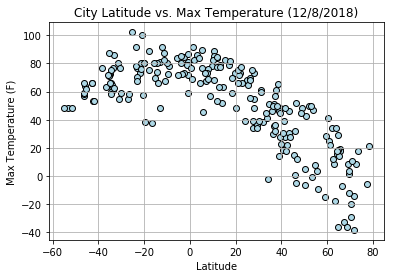

In [21]:
#Make a scatter plot with lightblue dots, grid, and other features
plt.scatter(Lat, MaxTemp, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (12/8/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

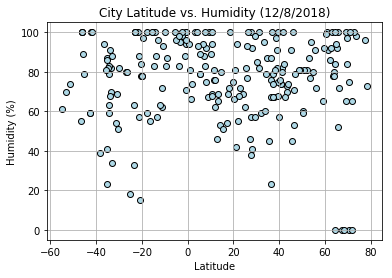

In [22]:
#Make scatter plot for humidity, same style
plt.scatter(Lat, Humidity, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (12/8/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

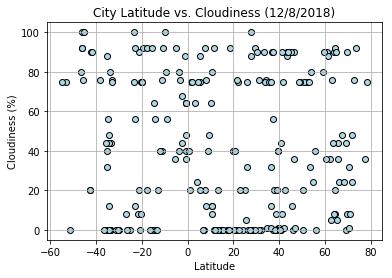

In [23]:
#Make a scatterplot for Cloudiness, same style
plt.scatter(Lat, Cloudiness, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (12/8/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

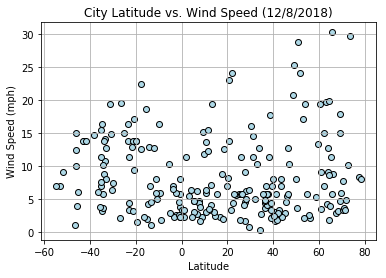

In [24]:
#Make a scatterplot for Windspeed, same style
plt.scatter(Lat, WindSpeed, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (12/8/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show